# Model Evaluation

Load packages

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix
from keras import backend as K

Load Model

In [8]:
model = tf.keras.models.load_model('/tmp/ml-pipeline/model/saved_model')

Load data

In [12]:
X_val = np.load('/tmp/ml-pipeline/data/X_val.npy')
y_val = np.load('/tmp/ml-pipeline/data/y_val.npy')
X_test = np.load('/tmp/ml-pipeline/data/X_test.npy')

Define metrics

In [6]:
# Precision (using keras backend)
def precision_metric(y_true, y_pred):
    threshold = 0.5  # Training threshold 0.5
    y_pred_y = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold), K.floatx())

    true_positives = K.sum(K.clip(y_true * y_pred, 0, 1))
    false_negatives = K.sum(K.clip(y_true * (1-y_pred), 0, 1))
    false_positives = K.sum(K.clip((1-y_true) * y_pred, 0, 1))
    true_negatives = K.sum(K.clip((1 - y_true) * (1-y_pred), 0, 1))

    precision = true_positives / (true_positives + false_positives + K.epsilon())
    return precision

# Recall (using keras backend)
def recall_metric(y_true, y_pred):
    threshold = 0.5 #Training threshold 0.5
    y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold), K.floatx())

    true_positives = K.sum(K.clip(y_true * y_pred, 0, 1))
    false_negatives = K.sum(K.clip(y_true * (1-y_pred), 0, 1))
    false_positives = K.sum(K.clip((1-y_true) * y_pred, 0, 1))
    true_negatives = K.sum(K.clip((1 - y_true) * (1-y_pred), 0, 1))

    recall = true_positives / (true_positives + false_negatives + K.epsilon())
    return recall

# F1-score (using keras backend)
def f1_metric(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    f1 = 2 * ((precision * recall) / (recall+precision+K.epsilon()))
    return f1


Predict

In [13]:
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_pred

132/132 [==============================] - 2s 16ms/step


array([6, 2, 7, ..., 3, 1, 5])

In [17]:
y_val_true = np.argmax(y_val,axis=1)
y_val_true

array([6, 2, 7, ..., 3, 1, 5])

Confusion matrix

In [ ]:
cm = confusion_matrix(np.argmax(y_val,axis=1), y_val_pred)

Text(50.722222222222214, 0.5, 'True')

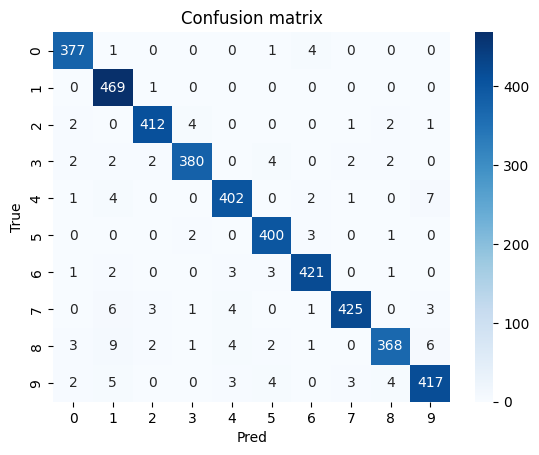

In [16]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Pred')
plt.ylabel('True')

Compile metrics and define artifacts

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_val_true, y_val_pred)
f1_macro = f1_score(y_val_true, y_val_pred, average="macro")
rec = recall_score(y_val_true, y_val_pred, average="macro")
prec = precision_score(y_val_true, y_val_pred, average="macro")
print(f'accuracy_score: {acc}')
print(f'f1_score_macro: {f1_macro}')
print(f'precision_score: {prec}')
print(f'recall_score: {rec}')

accuracy_score: 0.9692857142857143
f1_score_macro: 0.9692665406772226
precision_score: 0.9698987905751769
recall_score: 0.9689741132036749


In [19]:
import json

metadata = {
    'metrics': [
        {
            'name': 'accuracy-score',
            'numberValue':  acc,
            'format': 'PERCENTAGE'
        },
        {
            'name': 'f1-score',
            'numberValue':  f1_macro,
            'format': 'PERCENTAGE'
        },
        {
            'name': 'precision-score',
            'numberValue':  prec,
            'format': 'PERCENTAGE'
        },
        {
            'name': 'recall-score',
            'numberValue':  rec,
            'format': 'PERCENTAGE'
        }
    ]
}
with open('./mlpipeline-metrics.json', 'w') as f:
    json.dump(metadata, f)

> <div class="alert alert-block alert-info">
<b>Ok, not bad for our first model! The model has done a pretty good job at classifying each class and is obtaining a high accuracy score. Now we should take a look at the examples the model is misclassifying.</b>
</div>

In [20]:
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred,axis=1)
test_results = pd.DataFrame({'ImageID': np.arange(1,28001,1), 'Label': y_test_pred})

NameError: name 'X_test' is not defined